In [7]:
!pip install pandas


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install matplotlib



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd 
from matplotlib import pyplot as plt

In [11]:
df=pd.read_csv('nasdaq100.csv',sep=";")

In [12]:
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [13]:
#check null value exist or not 
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [14]:
#df.drop('Date',axis=1) when delete column
#df.drop('Date',axis=0) when delete row

df = df.drop(columns=['Date'])

In [20]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

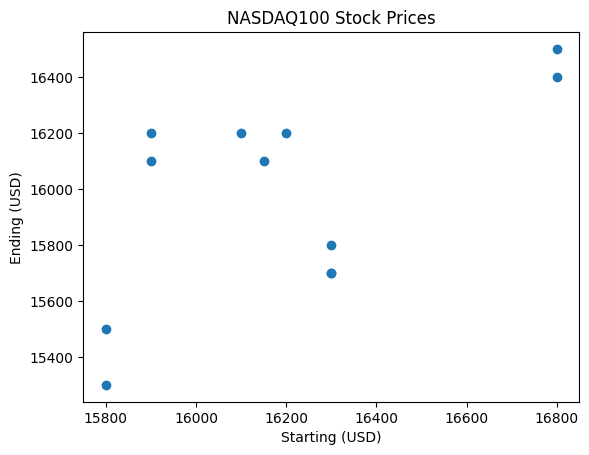

In [15]:
#visualize usd starting and ending data 
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [17]:
x=df.drop("Ending (USD)",axis=1)

In [18]:
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [21]:
y=df[['Ending (USD)']]

In [22]:
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


# Linear Regression 

In [45]:
from sklearn.linear_model import LinearRegression

In [47]:
reg = LinearRegression()

In [34]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [35]:
y.mean()

Ending (USD)    15975.0
dtype: float64

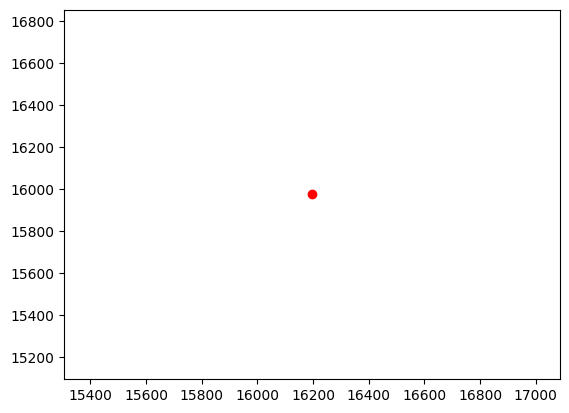

In [38]:
plt.scatter(x.mean(), y.mean(), color='red')

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

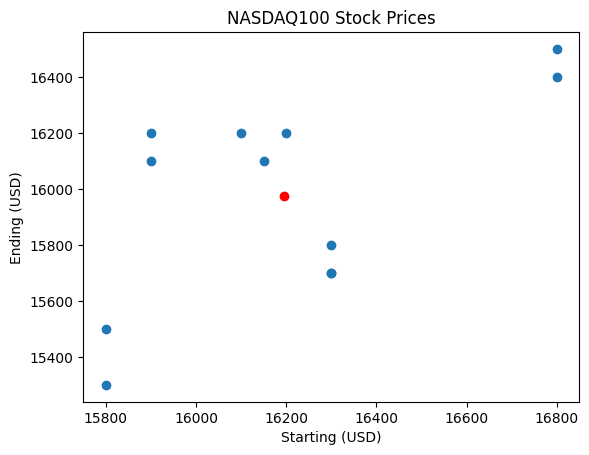

In [39]:
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [48]:
reg.fit(x, y) #train the ml model

LinearRegression()

In [57]:
# coeffient value 
m= reg.coef_
m

array([[0.65258293]])

In [56]:
c= reg.intercept_
c

array([5405.87555702])

In [55]:
#y=mx+c
m*16700 + c

array([[16304.0105628]])

In [58]:
reg.predict([[16700]])

C:\Users\h\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [64]:
df['predicted_y']=reg.predict(x)
df.head()

,Starting (USD),Ending (USD),predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


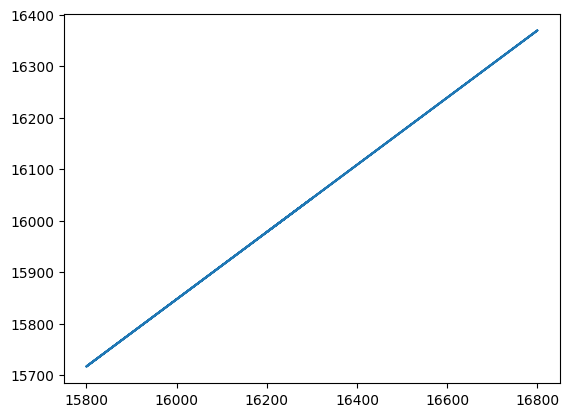

In [62]:
#plt.plot(x,df['predicted_y'])
plt.plot(x, reg.predict(x))

 # loss and cost function 

In [78]:
df['lose']=df['Ending (USD)'] - df['predicted_y']

In [79]:
df.head()

,Starting (USD),Ending (USD),predicted_y,loss,lose
0,16800,16500,16369.268856,130.731144,130.731144
1,15900,16100,15781.944215,318.055785,318.055785
2,15800,15300,15716.685922,-416.685922,-416.685922
3,16100,16200,15912.460802,287.539198,287.539198
4,16300,15700,16042.977389,-342.977389,-342.977389


In [71]:
#MSE and MAE
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [72]:
mse =mean_squared_error(df['Ending (USD)'],df['predicted_y'])

In [73]:
mse

80411.23397700385

In [74]:
mae =mean_absolute_error(df['Ending (USD)'],df['predicted_y'])

In [75]:
mae

260.3840017604666

In [80]:
#absolute value of lose
abs(df['lose'])

0     130.731144
1     318.055785
2     416.685922
3     287.539198
4     342.977389
5      30.731144
6     418.055785
7     216.685922
8     154.910051
9     242.977389
10    222.280904
11    342.977389
Name: lose, dtype: float64

In [81]:
sum(abs(df['lose']))/len(x)

260.3840017604666

In [82]:
#check perfromance 
reg.score(x,y)

0.3577804940272571

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

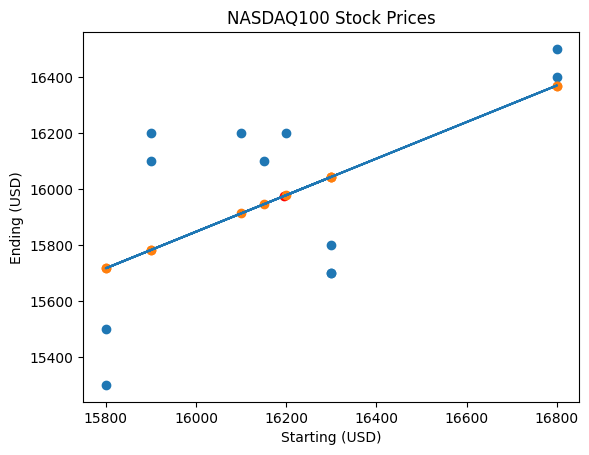

In [89]:
plt.plot(x, reg.predict(x))
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.scatter(df['Starting (USD)'],reg.predict(x))
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')
